<a href="https://colab.research.google.com/github/yantiputri/SEMESTER-3/blob/main/Praktikum05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Praktikum_ml/praktikum05'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ml/praktikum05/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
#cek missing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [ ]:
#cek duplicate
df.duplicated().sum()

#menghapus data duplicate
df.drop_duplicates(inplace=True)

#cek duplicated ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

Mengubah Nama Kolom (Rename Columns)

In [ ]:
df = df.rename(columns={
    'Jenis Kelamin' : 'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)' : 'tinggi_badan',
    'Berat Badan (kg)' : 'berat_badan',
    'Stunting' : 'stunting',
    'Wasting' : 'wasting',
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_badan   92692 non-null  float64
 3   berat_badan    92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


Data Understanding (Exploratory Data Analysis)

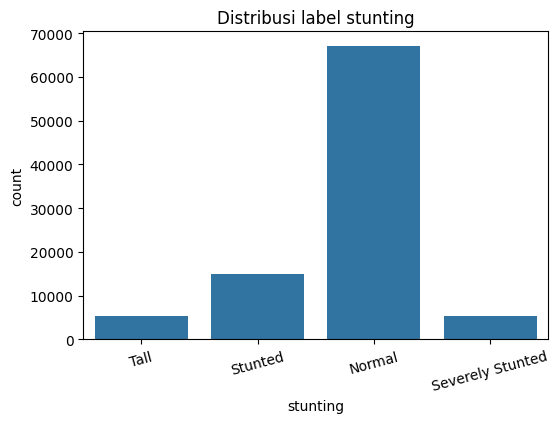

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label stunting')
plt.xticks(rotation=15)
plt.show()

Encoding Data Kategorikal (Mapping Label ke Kode Numerik)

In [ ]:
#mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)
df['stunting'] = stunting_cat.cat.codes

#fitur kategorikal lain (jenis_kelamin, wasting)
for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes
df.head()

,jenis_kelamin,umur_bulan,tinggi_badan,berat_badan,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


Analisis korelasi antar fitur

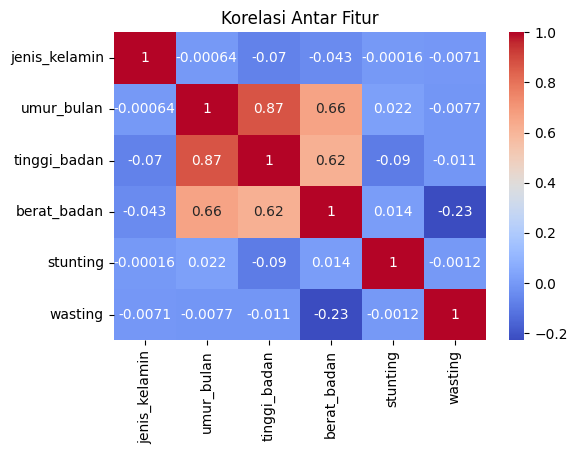

In [ ]:
#korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

Splitting Data (Pembagian Data Training dan Testing)

In [ ]:
#memilih fitur dan target
feature_cols = ['umur_bulan', 'tinggi_badan', 'berat_badan', 'wasting']
x = df[feature_cols]
y = df['stunting']

#membagi dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
len(x_train), len(x_test)

(74153, 18539)

Pembuatan Model Decision Tree

In [ ]:
#membangun model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Evaluasi Model Decision Tree

In [ ]:
#evaluasi
y_pred = dt.predict(x_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=stunting_classes))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



Visualisasi Hasil Model Decision Tree

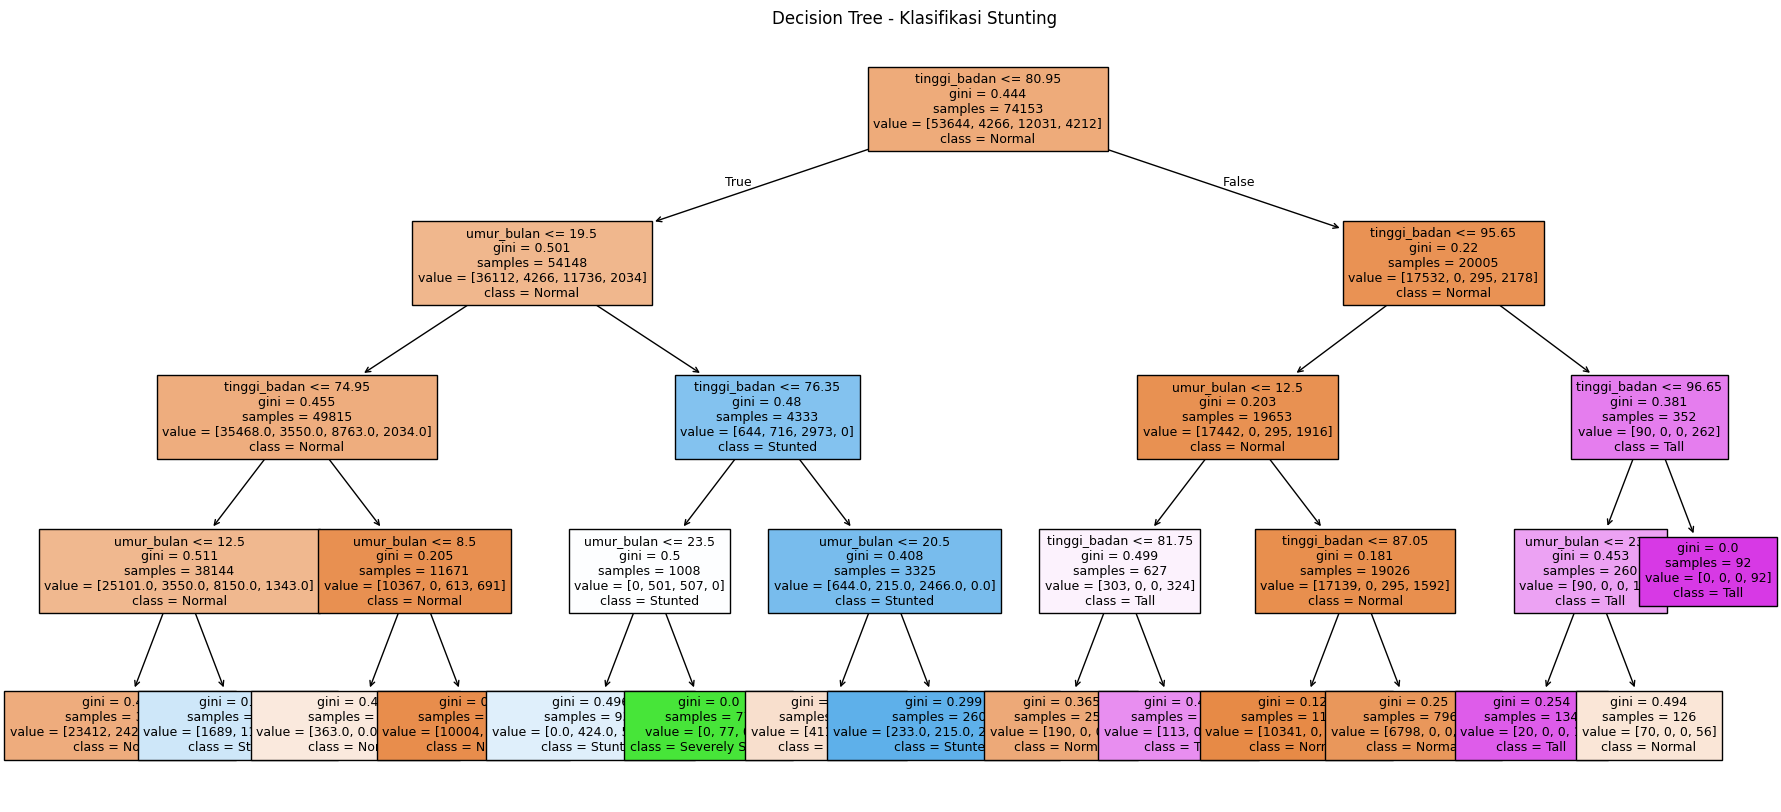

In [ ]:
#visualisasi model
plt.figure(figsize=(22, 10))
plot_tree(dt, feature_names=feature_cols, class_names=stunting_classes,filled=True, fontsize=9)
plt.title('Decision Tree - Klasifikasi Stunting')
plt.show()

Feature Importance (Fitur yang Paling Berpengaruh)

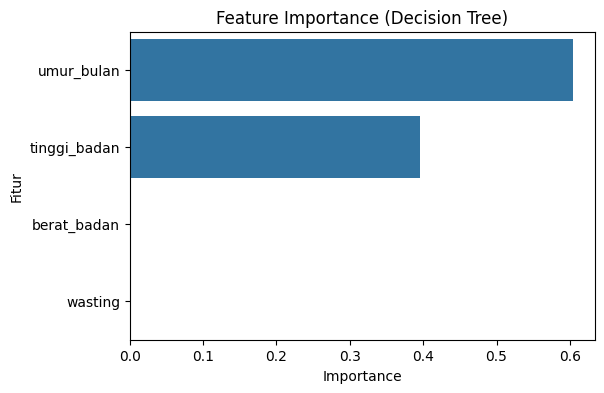

,0
umur_bulan,0.603752
tinggi_badan,0.396248
berat_badan,0.000000
wasting,0.000000


In [ ]:
#fitur yang penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

Hyperparameter Tuning (Menentukan max_depth Terbaik)

In [ ]:
scores = {}
for d in range(2, 9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(x_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(x_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc :", round(scores[best_d]*100,2), "%")

Best max_depth: 8 | Acc : 84.22 %
